In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# Simulating Microlensing graphs

$I_{obs} \left( t \right) = I_{s0} + I_{A} + N \left( \sigma^{2} \right) $

$I_{s0}$ is baseline, $I_{A}$ is lens magnification


In [0]:
import numpy as np
from matplotlib import pyplot as plt

## Baseline

$I_{s0} = m_{A} \mbox{sin} \left( \frac{2 \pi t}{T} + \phi \right) $

where

$m_{A}$ is amplitude

$T$ is period

$\phi$ is phase


In [0]:
def intensity_baseline(period, amplitude, phase, t):
  return amplitude * np.sin((2 * np.pi * t / period) + phase)

In [0]:
is0_ex1 = [intensity_baseline(5, 0.00005, 0, x) for x in range(100)]

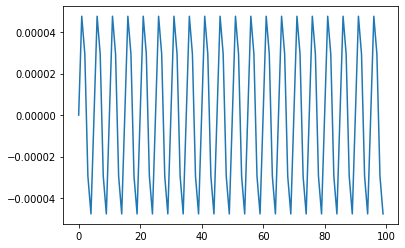

In [5]:
plot=plt.figure()
plt.plot(is0_ex1)
plot.savefig('/content/drive/My Drive/pTSA_microlensing/graph/curve_baseline.svg')
plot.show()

## Lens Magnification

$A \left( t \right) = \frac{\left[ u(t) \right]^{2} + 2}{u(t) + \sqrt{[u(t)]^2 + 4}} $

$u(t) = u_0 + \left| \frac{t-t_0}{T_E} \right|$

where

$u_0$ is minimum impact parameter

$T_E$ and $t_0$ determins the radius and shift in time

In [0]:
def lens_magnification(u0, t0, tE, t):
  ut = u0 + np.abs((t - t0) / tE)
  return (ut ** 2 + 2) / (ut * np.sqrt(ut**2 + 4))

In [0]:
iA_ex1 = [lens_magnification(10, 50, 2, x) for x in range(100)]

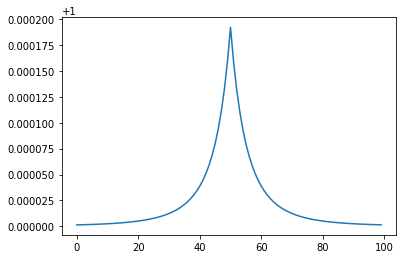

In [9]:
plot=plt.figure()
plt.plot(iA_ex1)
plot.savefig('/content/drive/My Drive/pTSA_microlensing/graph/curve_lens.svg')
plot.show()

## Putting all together

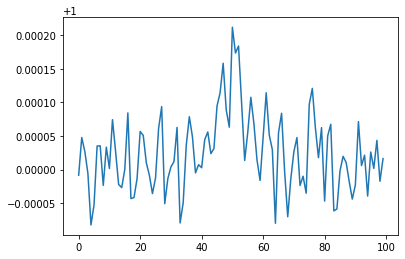

In [0]:
iobs_ex1 = np.array(iA_ex1) + np.array(is0_ex1) + np.random.normal(scale=0.00003, size=100)
plt.plot(iobs_ex1)

Perhaps its a good idea to normalize the graph so that it will have mean=0 and stdev=1

In [0]:
iobs_ex1_normalized = iobs_ex1 / np.linalg.norm(iobs_ex1)

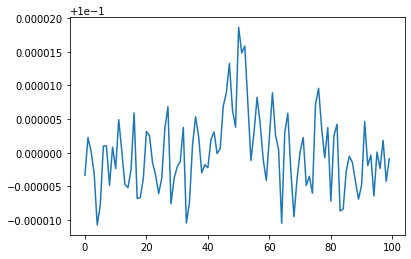

In [0]:
plt.plot(iobs_ex1_normalized)

In [0]:
import numpy as np
import matplotlib.pyplot as plt

def intensity_baseline(period, amplitude, phase, t):
  return amplitude * np.sin((2 * np.pi * t / period) + phase)


def lens_magnification(u0, t0, tE, t):
  ut = u0 + np.abs((t - t0) / tE)
  return (ut ** 2 + 2) / (ut * np.sqrt(ut**2 + 4))


def simulate_microlensing(baseline_period, baseline_amplitude, baseline_phase,
                          lens_min_impact, lens_shift, lens_radius, noise, t_range=range(100)):
  i_s0 = np.array([intensity_baseline(baseline_period, baseline_amplitude, baseline_phase, t) for t in t_range])
  i_A = np.array([lens_magnification(lens_min_impact, lens_shift, lens_radius, t) for t in t_range])
  n = np.random.normal(scale=noise, size=len(t_range))
  return i_s0 + i_A + n

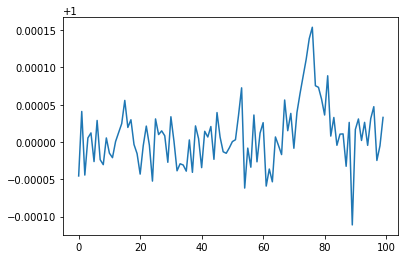

In [0]:
plt.plot(simulate_microlensing(baseline_period=2, baseline_amplitude=0.00001, baseline_phase=0,
                               lens_min_impact=10, lens_shift=75, lens_radius=1, noise=0.00003, t_range=range(100)))

# Injestion of data from UKIRT and MOA sources

# Fitting sampled data into ARIMA

Installing pyflux (library for time series analysis). Will be using ARIMA class for fitting the sampled data into ARIMA model and make prediction.

In [0]:
pip install pyflux 

  Using cached https://files.pythonhosted.org/packages/37/e2/ac8ea14d34556e83a9fe9e23ba7b02ca14951849b9637c238ca83d04ac3c/pyflux-0.4.15.tar.gz
  Using cached https://files.pythonhosted.org/packages/ab/c0/b0d967160ecc8db52ae34e063937d85e8d386f140ad4826aae2086245a5e/numdifftools-0.9.39-py2.py3-none-any.whl
  Created wheel for pyflux: filename=pyflux-0.4.15-cp36-cp36m-linux_x86_64.whl size=4656537 sha256=084e6b6475a56cc3f48e1d65f01a958a5cd740f9d43b2ad1c324b734018acb17
  Stored in directory: /root/.cache/pip/wheels/36/24/09/d18fa4f926cc90598d23ebd09fb4b0fd7b3dd1d2f506b952de
Successfully built pyflux


In [0]:
import pyflux as pf

Creating the model

In [0]:
data = simulate_microlensing(baseline_period=2, baseline_amplitude=0.00001, baseline_phase=0,
                               lens_min_impact=10, lens_shift=75, lens_radius=1, noise=0.00003, t_range=range(100))

model = pf.ARIMA(data=data, ar=10, integ=1, ma=10, target='microlense', family=pf.Normal())

Fitting the data and getting the summary

In [0]:
fit = model.fit("MLE")
fit.summary()

Normal ARIMA(10,1,10)                                                                                     
======================================================= ==================================================
Dependent Variable: Differenced Series                  Method: MLE                                       
Start Date: 10                                          Log Likelihood: 777.3779                          
End Date: 99                                            AIC: -1510.7558                                   
Number of observations: 89                              BIC: -1456.0058                                   
Latent Variable                          Estimate   Std Error  z        P>|z|    95% C.I.                 
======================================== ========== ========== ======== ======== =========================
Constant                                 0.0        0.0        0.0823   0.9344   (-0.0 | 0.0)             
AR(1)                                

Plotting the fit-

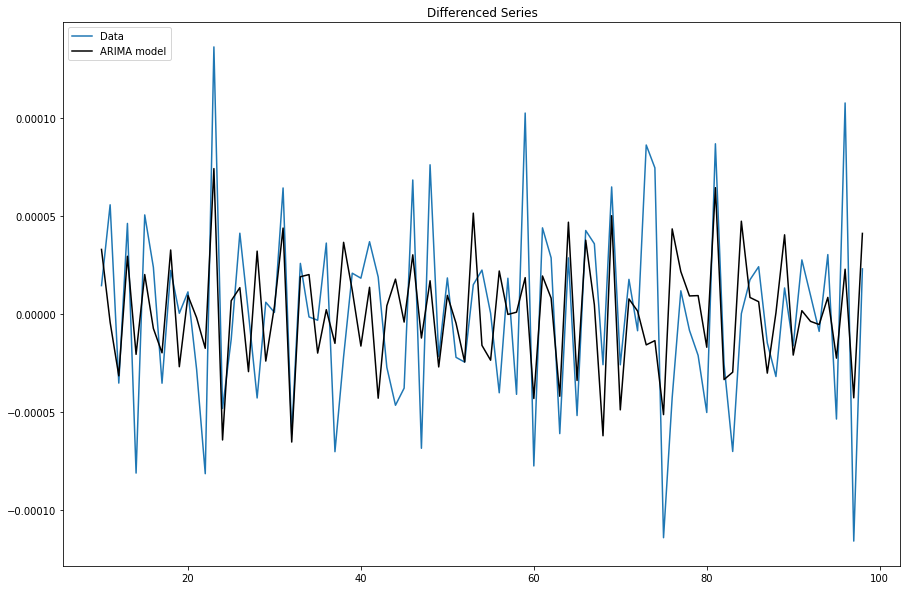

In [0]:
model.plot_fit(figsize=(15,10))

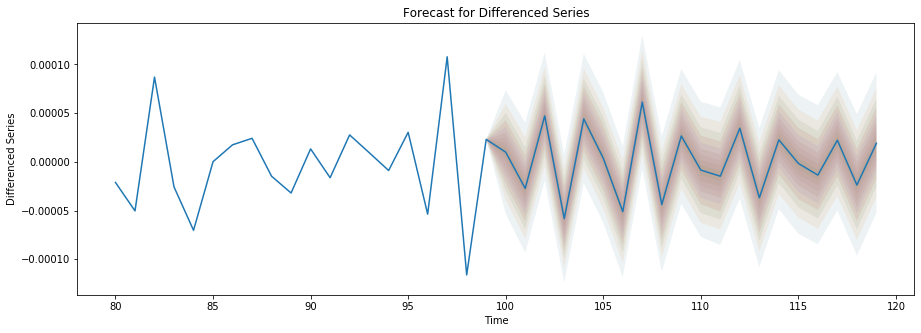

In [0]:
model.plot_predict(h=20,past_values=20,figsize=(15,5))

Predicting the future values

In [0]:
y_pred = model.predict(h, intervals=False)

# Injecting the residuals into LSTM 

Building the LSTM model

In [0]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [0]:
# Initialising the RNN
rnn_lstm = Sequential()

In [0]:
# Adding the LSTM layers and some Dropout regularisation

# Adding the first layer
rnn_lstm.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
rnn_lstm.add(Dropout(0.2))

# Adding the second layer
rnn_lstm.add(LSTM(units=50, return_sequences=True))
rnn_lstm.add(Dropout(0.2))


In [0]:
# Output layer
rnn_lstm.add(Dense(units=1))


In [0]:
# Compiling the RNN
rnn_lstm.compile(optimizer='adam', loss='mean_squared_error')

In [0]:
# Fitting the RNN to training set
rnn_lstm.fit(X_train, Y_train, batch_size=32, epochs=100)

In [0]:
lstm_pred=rnn_lstm.predict(X_test) 